In [12]:
import math
import os
import pathlib
import shutil

from astropy import units as u
from matplotlib import pyplot as plt
from neclib import config
from neclib.core import Parameters
from scipy import optimize
import cv2
import numpy as np

In [13]:
date = pathlib.Path(os.getcwd()).name  # e.g. "20201111_144501"

In [14]:
# Get ``pointing_param_path`` from ``config``.
data_dir = f"/Users/kirby/Downloads/optical_pointing/{date}/"
pic_dir = f"/Users/kirby/Downloads/optical_pointing/{date}/"
kisa_file = f"/Users/kirby/Downloads/optical_pointing/pointing_param.toml"
# data_dir = "/home/exito/data/operation/optical_pointing/"+date+"/"
# pic_dir = "/home/exito/data/operation/optical_pointing/picture/"+date+"/"
# kisa_file = "/home/exito/ros/src/necst-1p85m2019/lib/kisa.dat"

In [15]:
def write_param(filepath, model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2):
    with open(filepath, mode="w") as file:
        param = (
            f'[metadata]\n'
            f'model = "{model}"\n'
            f'\n'
            f'[pointing_params]\n'
            f'"a1[deg]" = {a1.to("deg").value}\n'
            f'"a2[deg]" = {a2.to("deg").value}\n'
            f'"a3[deg]" = {a3.to("deg").value}\n'
            f'"b1[deg]" = {b1.to("deg").value}\n'
            f'"b2[deg]" = {b2.to("deg").value}\n'
            f'"b3[deg]" = {b3.to("deg").value}\n'
            f'g1 = {g1}\n'
            f'"c1[deg]" = {c1.to("deg").value}\n'
            f'"c2[deg]" = {c2.to("deg").value}\n'
            f'"d1[deg]" = {d1.to("deg").value}\n'
            f'"d2[deg]" = {d2.to("deg").value}\n'
            f'"e1[deg]" = {e1.to("deg").value}\n'
            f'"e2[deg]" = {e2.to("deg").value}\n'
        )
        file.write(param)

In [16]:
param_before = Parameters.from_file(f"{data_dir}/pointing_param_before.toml")
def apply_kisa():
        if param_before.model != "omu1p85m":
                raise NotImplementedError(f"This analysis is only for model omu1p85m, not {param_before.model}.")
        # fkisa = open(kisa_file,"r")
        # kisa = fkisa.readlines()
        param_delta = Parameters.from_file(f"{data_dir}/pointing_param_delta.toml")
        # fdkisa = open(f"{data_dir}/pointing_param_delta", "r")
        # dkisa = fdkisa.readlines()
        a1 = param_before.a1 + param_delta.a1
        a2 = param_before.a2 + param_delta.a2
        a3 = param_before.a3 + param_delta.a3
        b1 = param_before.b1 + param_delta.b1
        b2 = param_before.b2 + param_delta.b2
        b3 = param_before.b3 + param_delta.b3
        g1 = param_before.g1 + param_delta.g1
        c1 = param_before.c1
        c2 = param_before.c2
        d1 = param_before.d1
        d2 = param_before.d2
        e1 = param_before.e1
        e2 = param_before.e2
        # fkisa.close()

        # old_kisa_file = f"{data_dir}/pointing_param_before.toml"
        # shutil.copy(kisa_file, old_kisa_file)
        # print("``pointing_param_before.toml`` was created.")

        write_param(f"{data_dir}/pointing_param_after.toml", param_before.model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2)
        # nkisa = open(kisa_file,"w")
        # param_new = (f'[metadata]\n'
        #              f'model = "{param.model}"\n'
        #              f'\n'
        #              f'[pointing_params]\n'
        #              f'"a1[deg]" = {a1.to("deg").value}\n'
        #              f'"a2[deg]" = {a2.to("deg").value}\n'
        #              f'"a3[deg]" = {a3.to("deg").value}\n'
        #              f'"b1[deg]" = {b1.to("deg").value}\n'
        #              f'"b2[deg]" = {b2.to("deg").value}\n'
        #              f'"b3[deg]" = {b3.to("deg").value}\n'
        #              f'g1 = {g1}\n'
        #              f'"c1[deg]" = {c1.to("deg").value}\n'
        #              f'"c2[deg]" = {c2.to("deg").value}\n'
        #              f'"d1[deg]" = {d1.to("deg").value}\n'
        #              f'"d2[deg]" = {d2.to("deg").value}\n'
        #              f'"e1[deg]" = {e1.to("deg").value}\n'
        #              f'"e2[deg]" = {e2.to("deg").value}\n')
        # nkisa.write(param_new)
        # nkisa.write(str(a1)+"\n")
        # nkisa.write(str(a2)+"\n")
        # nkisa.write(str(a3)+"\n")
        # nkisa.write(str(b1)+"\n")
        # nkisa.write(str(b2)+"\n")
        # nkisa.write(str(b3)+"\n")
        # nkisa.write(str(g1)+"\n")
        # nkisa.write(str(c1)+"\n")
        # nkisa.write(str(c2)+"\n")
        # nkisa.write(str(d1)+"\n")
        # nkisa.write(str(d2)+"\n")    
        # nkisa.write(str(e1)+"\n")
        # nkisa.write(str(e2)+"\n")
        # nkisa.close()

        # new_kisa_file = data_dir + "pointing_param_after.toml"
        shutil.copy(f"{data_dir}/pointing_param_after.toml", kisa_file)
        print("``pointing_param_after.toml`` was created and pointing_param was updated.")
        print("Data location : " + data_dir)
        print("======= ``pointing_param_delta.toml`` =======")
        print(param_delta)
        # print(a1)
        # print(a2)
        # print(a3)
        # print(b1)
        # print(b2)
        # print(b3)
        # print(g1)
        # print(c1)
        # print(c2)
        # print(d1)
        # print(d2)
        # print(e1)
        # print(e2)

In [17]:
def scatter_plot(x, y, xlabel, ylabel,d_rms):
    plt.figure()
    plt.scatter(x, y, s=5)
    if xlabel[0] == 'dAz' and ylabel[0] == 'dEl' or xlabel[0] == 'zansa_dAz' and ylabel[0] == 'zansa_dEl':
        plt.title('%s_vs_%s\nrms = %0.2f[arcsec]'%(xlabel[0], ylabel[0], d_rms))
        plt.axes().set_aspect('equal', 'datalim')
        X, Y = [], []
        for num in np.linspace(-180,180,360):
            r = 5. #[arcsec]
            X.append(r * math.sin(math.radians(num)))
            Y.append(r * math.cos(math.radians(num)))
        plt.plot(X, Y,"r")
    elif xlabel[0] == 'Az' and ylabel[0] == 'El':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    elif xlabel[0] == 'Az':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    elif xlabel[0] == 'El':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    else:
        print('use correct label name')

    plt.xlabel('%s [%s]'%xlabel)
    plt.ylabel('%s [%s]'%ylabel)
    plt.grid()
    plt.savefig(data_dir + '%s_vs_%s.png'%(xlabel[0], ylabel[0]))

In [18]:
def calc_daz_del():
    filepath = data_dir + date +".dat"
    npix_x = 6000   #number of pixcels
    npix_y = 4000
    sensor_x = 22.3   #sensor size[mm]
    f = 500.   #shoten kyori[mm]
    fl = np.loadtxt(filepath,dtype="unicode").T[2].tolist()
    _Az = np.loadtxt(filepath,dtype="unicode").T[0].tolist()
    print(fl, _Az)
    Az = [float(i) for i in _Az]
    _El = np.loadtxt(filepath,dtype="unicode").T[1].tolist()
    El = [float(i) for i in _El]
    pix_x = []
    pix_y = []
    figli = []
    starp = []
    for i,fl1 in enumerate(fl):
        try:
            img = cv2.imread(pic_dir+fl1, cv2.IMREAD_GRAYSCALE)
            print("calculated dAz dEl : "+pic_dir+fl1)
            img = np.flipud(img)
            ret, nimg = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)  # 点源検出
            contours, hierarchy = cv2.findContours(nimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 点源検出
            stars = []
            areas = []
            for cnt in contours:
                M = cv2.moments(cnt)
                if M['m00'] != 0:
                    cx = int(M['m10']/M['m00'])
                    cy = int(M['m01']/M['m00'])
                    stars.append(np.array([[cx,cy]], dtype='int32'))
                else:
                    stars.append(np.array([cnt[0][0]], dtype='int32'))
                areas.append(cv2.contourArea(cnt))

            areasarr = np.array(areas)
            idx = areasarr.argmax()
            plt.imshow(np.flipud(cv2.imread(pic_dir+fl1)), vmin=0, vmax=256)
            plt.xlim(0, npix_x)
            plt.ylim(0, npix_y)
            plt.plot(stars[idx][0][0], stars[idx][0][1], marker='+', ms=8, alpha=0.7, color="red", mew=0.2)
            plt.title("Az : "+str(Az[i])+" EL : "+str(El[i]))
            plt.savefig(data_dir+os.path.splitext(os.path.basename(pic_dir+fl1))[0]+'.mark.png', dpi=300)
            plt.show()
            plt.close()
            pix_x.append(stars[idx][0][0])
            pix_y.append(stars[idx][0][1])
        except:
            pix_x.append(np.nan)
            pix_y.append(np.nan)
            print("ERROR : can not find star position")
            print(fl1)
    

    pix = np.array([pix_x, pix_y]).T

    dpix_x = (pix[:,0] - npix_x//2)
    dpix_y = (pix[:,1] - npix_y//2)

    theta_x = 2 * np.degrees(np.arctan(sensor_x / (2*f)))   #[degree]

    theta_x_pix = (theta_x / npix_x) * 3600.   #[arcsec]

    #---pixcel --> pix_x_to_arcsec
    d_x = dpix_x * theta_x_pix   #[arcsec]
    d_y = dpix_y * theta_x_pix   #[arcsec]

    d_x_sigma = np.nanstd(d_x)
    d_y_sigma = np.nanstd(d_y)

    d_x_rms = np.sqrt(np.nansum(d_x**2)/len(d_x))
    d_y_rms = np.sqrt(np.nansum(d_y**2)/len(d_y))

    d_rms = np.sqrt(d_x_rms**2 + d_y_rms**2)
    d_sigma = np.sqrt(d_x_sigma**2 + d_y_sigma**2)

    print('rms = %0.2f [arcsec]'%d_rms)
    print('sigma = %0.2f [arcsec]'%d_sigma)

    p_array = np.array([Az, El, d_x, d_y]).T
    np.savetxt(data_dir + 'Az_El_dAz_dEl.dat', p_array, delimiter=', ')
    scatter_plot(Az, El, ('Az', 'degree'), ('El', 'degree'), d_rms)
    scatter_plot(Az, d_x, ('Az', 'degree'), ('dAz', 'arcsec'), d_rms)
    scatter_plot(Az, d_y, ('Az', 'degree'), ('dEl', 'arcsec'), d_rms)
    scatter_plot(El, d_x, ('El', 'degree'), ('dAz', 'arcsec'), d_rms)
    scatter_plot(El, d_y, ('El', 'degree'), ('dEl', 'arcsec'), d_rms)
    scatter_plot(d_x, d_y, ('dAz', 'arcsec'), ('dEl', 'arcsec'), d_rms)
    
    return np.array([(_az, _el, _dx, _dy) for _az, _el, _dx, _dy in zip(Az, El, d_x, d_y)], dtype=[('az', float), ('el', float), ('dx', float), ('dy', float)])


['20201111_144642.JPG', '20201111_144706.JPG', '20201111_144723.JPG'] ['10.0', '11.0', '12.0']
calculated dAz dEl : /Users/kirby/Downloads/optical_pointing/20201111_144501/20201111_144642.JPG


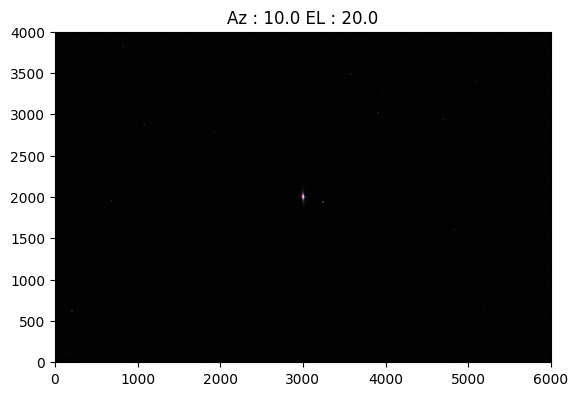

calculated dAz dEl : /Users/kirby/Downloads/optical_pointing/20201111_144501/20201111_144706.JPG


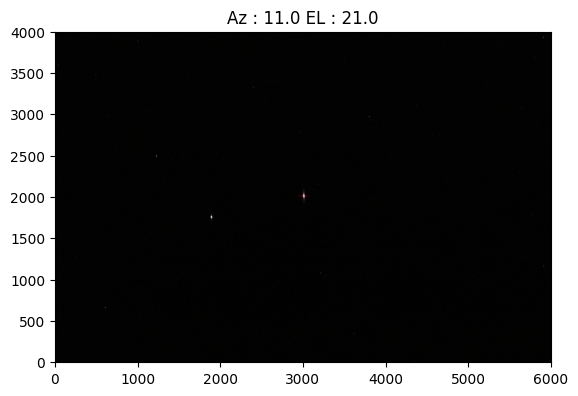

calculated dAz dEl : /Users/kirby/Downloads/optical_pointing/20201111_144501/20201111_144723.JPG


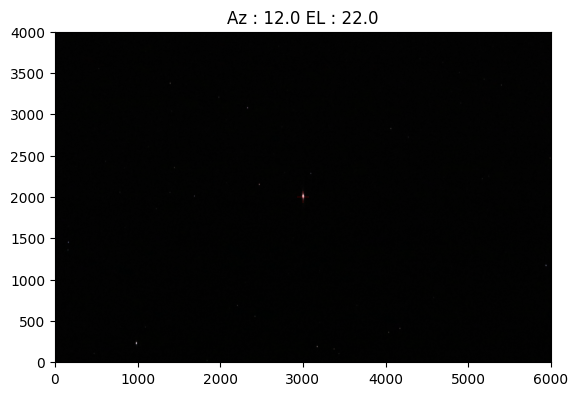

rms = 12.33 [arcsec]
sigma = 9.31 [arcsec]


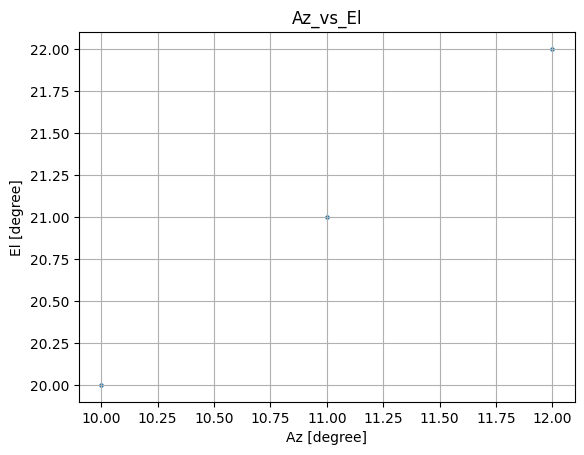

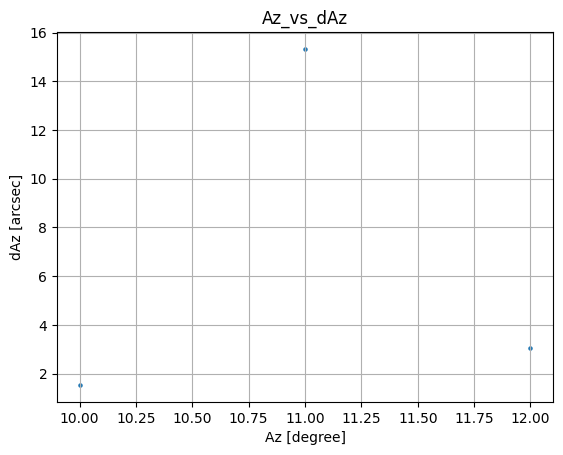

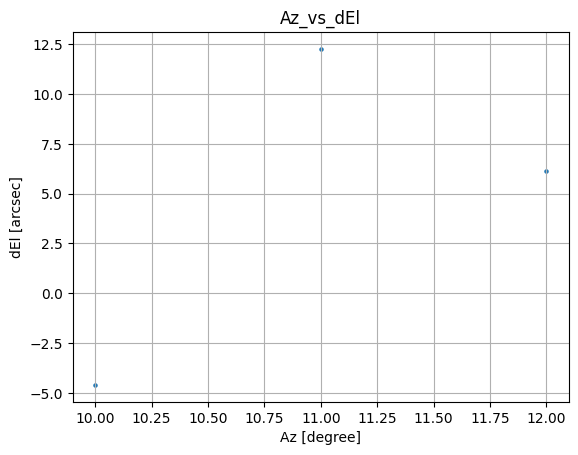

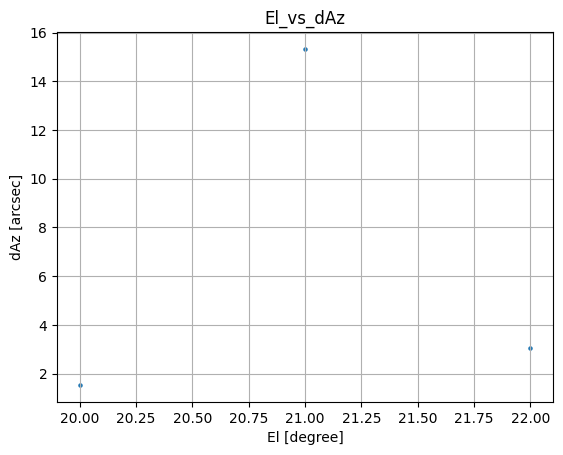

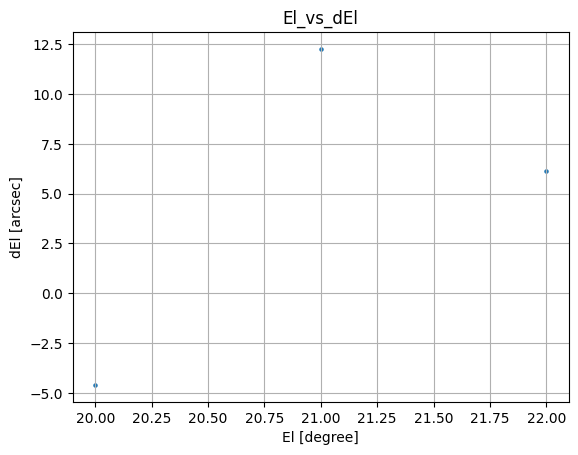

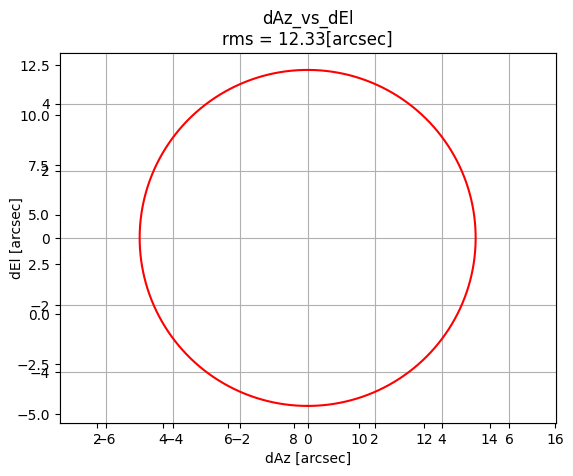

In [19]:
results = calc_daz_del()

In [20]:
results

array([(10., 20.,  1.53298098, -4.59894294),
       (11., 21., 15.32980981, 12.26384785),
       (12., 22.,  3.06596196,  6.13192393)],
      dtype=[('az', '<f8'), ('el', '<f8'), ('dx', '<f8'), ('dy', '<f8')])

In [21]:
len(results)

3

In [22]:
# いらない点を除去
bad_data_mask = abs(results['dy']) < 500
bad_data_mask
#bad_data_mask = results['dy'] <1000 
#

array([ True,  True,  True])

In [23]:
results2 = results[bad_data_mask]

In [24]:
len(results2)

3

In [25]:
dx_sigma = np.nanstd(results2['dx'])
dy_sigma = np.nanstd(results2['dy'])
d_sigma = np.sqrt(dx_sigma**2 + dy_sigma**2)

print('sigma = %0.2f [arcsec]'%d_sigma)


sigma = 9.31 [arcsec]


In [26]:
def f_az2(X, a1, a2, a3, b1, b2, b3, g1):
    Az, El = X
    return np.cos(El*(np.pi/180.))*((a1 * np.tan(El*(np.pi/180.))) + (a2 / np.cos(El*(np.pi/180.))) + a3 + ((b1 * np.sin(Az*(np.pi/180.)) * np.sin(El*(np.pi/180.)) - b2 * np.cos(Az*(np.pi/180.)) * np.sin(El*(np.pi/180.))) / np.cos(El*(np.pi/180.))))

def f_el2(X, a1, a2, a3, b1, b2, b3, g1):
    Az, El = X
    return (b1 * np.cos(Az*(np.pi/180.))) + (b2 * np.sin(Az*(np.pi/180.))) + b3 + (g1 * El)

def eval_func(p, az, el, dx, dy):
    results_dx = f_az2([az, el], *p)
    return (dx - results_dx)**2 

def eval_func2(p, az, el, dx, dy):
    results_dy = f_el2([az, el],*p)
    return (dy - results_dy)**2 

def eval_func3(p, az, el, dx, dy):
    results_dx = f_az2([az, el], *p)
    results_dy = f_el2([az, el], *p)
    return (dx - results_dx)**2 + (dy- results_dy)**2

In [27]:
pp1 = optimize.least_squares(eval_func, x0=[0,0,0,0,0,0,0], args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))
pp2 = optimize.least_squares(eval_func2, x0=[0,0,0,0,0,0,0], args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))

In [28]:
pp = list(pp1.x[0:3])+list(pp2.x[3:7])

In [29]:
pp3 = optimize.least_squares(eval_func3, x0=pp, args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))

In [30]:
pp3.x

array([ 11690.7393567 ,  10225.28224565,  22218.64974606,  29813.09701623,
       105787.83581766, -10952.46170059,  -1832.48794209])

In [31]:
pp3.x/3600

array([ 3.2474276 ,  2.84035618,  6.17184715,  8.28141584, 29.38550995,
       -3.04235047, -0.50902443])

In [32]:
bestfit_dx = f_az2([results2['az'],results2['el']], *pp3.x)
bestfit_dy = f_el2([results2['az'],results2['el']], *pp3.x)

In [33]:
error_dx = results2['dx'] - bestfit_dx
error_dy = results2['dy'] - bestfit_dy

bestfit_dx_sigma = np.nanstd(error_dx)
bestfit_dy_sigma = np.nanstd(error_dy)
bestfit_d_sigma = np.sqrt(bestfit_dx_sigma**2 + bestfit_dy_sigma**2)

print('bestfit_sigma = %0.2f [arcsec]'%bestfit_d_sigma)

bestfit_sigma = 1016.92 [arcsec]


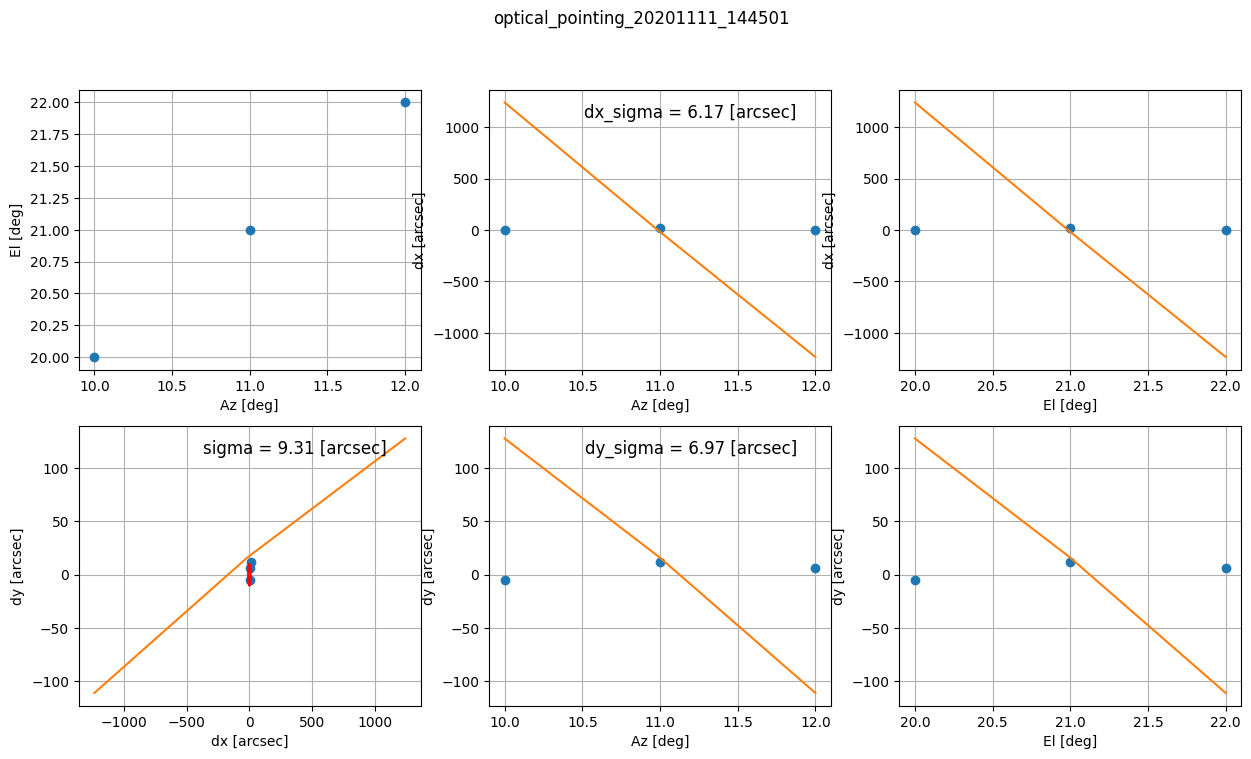

In [34]:
fig = plt.figure(figsize=[15,8])
ax = [fig.add_subplot(2,3,i) for i in range(1,7)]

ax[0].plot(results2['az'], results2['el'], 'o')
ax[0].set_xlabel('Az [deg]')
ax[0].set_ylabel('El [deg]')

ax[1].plot(results2['az'], results2['dx'], 'o')
ind1=np.argsort(results2['az'])
ax[1].plot(results2['az'][ind1], bestfit_dx[ind1], '-')
ax[1].set_xlabel('Az [deg]')
ax[1].set_ylabel('dx [arcsec]')
ax[1].text(0.9, 0.95, 'dx_sigma = %0.2f [arcsec]'%dx_sigma, size=12, ha='right', va='top', transform=ax[1].transAxes,)

ax[2].plot(results2['el'], results2['dx'], 'o')
ind2=np.argsort(results2['el'])
ax[2].plot(results2['el'][ind2], bestfit_dx[ind2], '-')
ax[2].set_xlabel('El [deg]')
ax[2].set_ylabel('dx [arcsec]')

ax[3].plot(results2['dx'], results2['dy'], 'o')
ax[3].plot(bestfit_dx, bestfit_dy, '-')
ax[3].set_xlabel('dx [arcsec]')
ax[3].set_ylabel('dy [arcsec]')
ax[3].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%d_sigma, size=12, ha='right', va='top', transform=ax[3].transAxes,)

X, Y = [], []
for num in np.linspace(-180,180,360):
    r = 10. #[arcsec]
    X.append(r * math.sin(math.radians(num)))
    Y.append(r * math.cos(math.radians(num)))
ax[3].plot(X, Y,"r")

ax[4].plot(results2['az'], results2['dy'], 'o')
ax[4].plot(results2['az'][ind1], bestfit_dy[ind1], '-')
ax[4].set_xlabel('Az [deg]')
ax[4].set_ylabel('dy [arcsec]')
ax[4].text(0.9, 0.95, 'dy_sigma = %0.2f [arcsec]'%dy_sigma, size=12, ha='right', va='top', transform=ax[4].transAxes,)

ax[5].plot(results2['el'], results2['dy'], 'o')
ax[5].plot(results2['el'][ind2], bestfit_dy[ind2], '-')
ax[5].set_xlabel('El [deg]')
ax[5].set_ylabel('dy [arcsec]')

[a.grid(True) for a in ax]

fig.suptitle("optical_pointing_" + date )
fig.savefig("optical_pointing_" + date +".png")

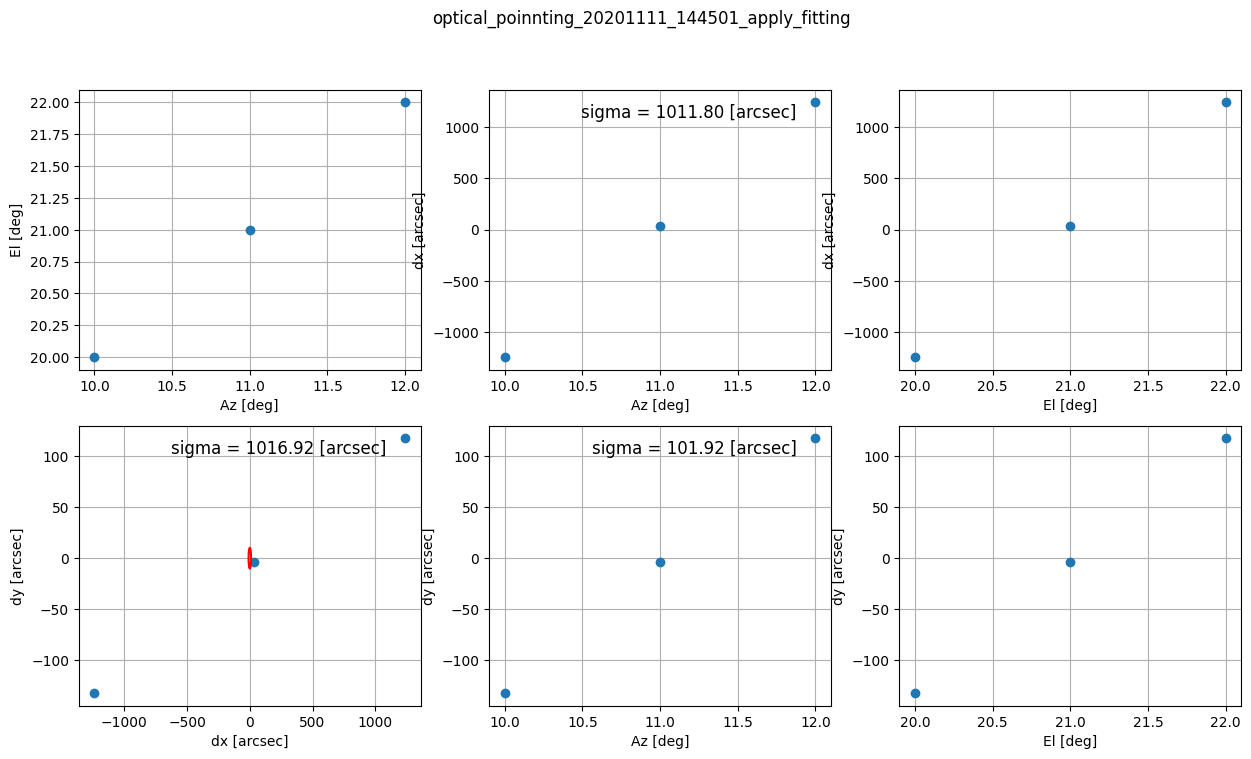

In [35]:
fig = plt.figure(figsize=[15,8])
ax = [fig.add_subplot(2,3,i) for i in range(1,7)]

ax[0].plot(results2['az'], results2['el'], 'o')
ax[0].set_xlabel('Az [deg]')
ax[0].set_ylabel('El [deg]')

ax[1].plot(results2['az'], results2['dx']-bestfit_dx, 'o')
ax[1].set_xlabel('Az [deg]')
ax[1].set_ylabel('dx [arcsec]')
ax[1].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_dx_sigma, size=12, ha='right', va='top', transform=ax[1].transAxes,)

ax[2].plot(results2['el'], results2['dx']-bestfit_dx, 'o')
ax[2].set_xlabel('El [deg]')
ax[2].set_ylabel('dx [arcsec]')

ax[3].plot(results2['dx']-bestfit_dx, results2['dy']-bestfit_dy, 'o')
ax[3].set_xlabel('dx [arcsec]')
ax[3].set_ylabel('dy [arcsec]')
ax[3].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_d_sigma, size=12, ha='right', va='top', transform=ax[3].transAxes,)

X, Y = [], []
for num in np.linspace(-180,180,360):
    r = 10. #[arcsec]
    X.append(r * math.sin(math.radians(num)))
    Y.append(r * math.cos(math.radians(num)))
ax[3].plot(X, Y,"r")

ax[4].plot(results2['az'], results2['dy']-bestfit_dy, 'o')
ax[4].set_xlabel('Az [deg]')
ax[4].set_ylabel('dy [arcsec]')
ax[4].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_dy_sigma, size=12, ha='right', va='top', transform=ax[4].transAxes,)

ax[5].plot(results2['el'], results2['dy']-bestfit_dy, 'o')
ax[5].set_xlabel('El [deg]')
ax[5].set_ylabel('dy [arcsec]')

[a.grid(True) for a in ax]

fig.suptitle("optical_poinnting_" + date +"_apply_fitting" )
fig.savefig("optical_poinnting_" + date +"_apply_fitting.png")

In [36]:
dkisa_array = pp3.x.T/3600
a1 = dkisa_array[0] * u.deg
a2 = dkisa_array[1] * u.deg
a3 = dkisa_array[2] * u.deg
b1 = dkisa_array[3] * u.deg
b2 = dkisa_array[4] * u.deg
b3 = dkisa_array[5] * u.deg
g1 = dkisa_array[6]
c1 = 0.0 * u.deg
c2 = 0.0 * u.deg
d1 = 0.0 * u.deg
d2 = 0.0 * u.deg
e1 = 0.0 * u.deg
e2 = 0.0 * u.deg
write_param(f"{data_dir}/pointing_param_delta.toml", param_before.model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2)
# np.savetxt(f"{data_dir}/pointing_param_delta.toml", dkisa_array)

In [37]:
np.savetxt(date+"_results2_day3.3.txt",results2)

In [131]:
# apply_kisa() #don't use 

``pointing_param_after.toml`` was created and pointing_param was updated.
Data location : /Users/kirby/Downloads/optical_pointing/20201111_144501/
======= ``pointing_param_delta.toml`` =======
Parameters
model = omu1p85m (str)
a1    = 3.2474275990838617 deg (Angle)
a2    = 2.840356179347003 deg (Angle)
a3    = 6.171847151682591 deg (Angle)
b1    = 8.281415837841992 deg (Angle)
b2    = 29.385509949349704 deg (Angle)
b3    = -3.04235047238553 deg (Angle)
g1    = -0.5090244283577567 (float)
c1    = 0.0 deg (Angle)
c2    = 0.0 deg (Angle)
d1    = 0.0 deg (Angle)
d2    = 0.0 deg (Angle)
e1    = 0.0 deg (Angle)
e2    = 0.0 deg (Angle)


In [ ]:
#np.savetxt(date+"_results2_day2.2.txt",results2)